# **Exploratory Data Analysis**

#### **Importing Libraries and Dataset**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import os

mock_dataset_source_path: str = os.path.abspath("../data/mock/mock_dataset.csv")

dataframe: pd.DataFrame = pd.read_csv(mock_dataset_source_path)

#### **Data Exploration**

In [3]:
dataframe.info()

num_of_rows: int = dataframe.shape[0]
num_of_cols: int = dataframe.shape[1]
print(f"\nNumber of Rows: {num_of_rows}\nNumber of Columns: {num_of_cols}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5602 entries, 0 to 5601
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Category         5602 non-null   object
 1   Message          5602 non-null   object
 2   Sent_Date        5602 non-null   object
 3   Sent_Time        5602 non-null   object
 4   Source_IP        5602 non-null   object
 5   Source_Location  5602 non-null   object
dtypes: object(6)
memory usage: 262.7+ KB

Number of Rows: 5602
Number of Columns: 6


In [4]:
dataframe.describe()

,Category,Message,Sent_Date,Sent_Time,Source_IP,Source_Location
count,5602,5602,5602,5602,5602,5602
unique,2,5157,92,5228,4776,10
top,ham,"Sorry, I'll call later",2025-09-24,02:44:05,203.0.113.144,"('Indonesia', 'DKI Jakarta')"
freq,4825,30,77,7,9,904


In [5]:
display(dataframe.head())

,Category,Message,Sent_Date,Sent_Time,Source_IP,Source_Location
0,ham,"Go until jurong point, crazy.. Available only ...",2025-07-20,16:50:55,203.0.113.61,"('Malaysia', 'Selangor')"
1,ham,Ok lar... Joking wif u oni...,2025-07-11,16:16:38,10.0.240.27,"('Malaysia', 'Selangor')"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,2025-07-21,00:53:38,37.120.103.92,"('United States', 'Virginia')"
3,ham,U dun say so early hor... U c already then say...,2025-09-28,14:33:15,10.0.179.179,"('United States', 'Virginia')"
4,ham,"Nah I don't think he goes to usf, he lives aro...",2025-09-03,12:58:55,203.0.113.94,"('Thailand', 'Bangkok')"


**Count plot of Category**

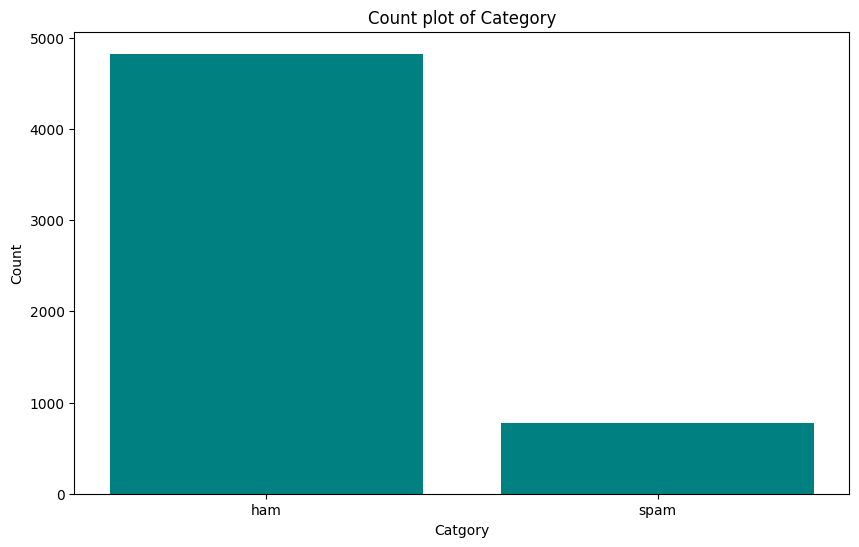

Category
ham     4825
spam     777
Name: count, dtype: int64

In [6]:
category_counts = dataframe["Category"].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts, color="teal")
plt.title("Count plot of Category")
plt.xlabel("Catgory")
plt.ylabel("Count")
plt.show()

category_counts

**Count plot of Source Location**

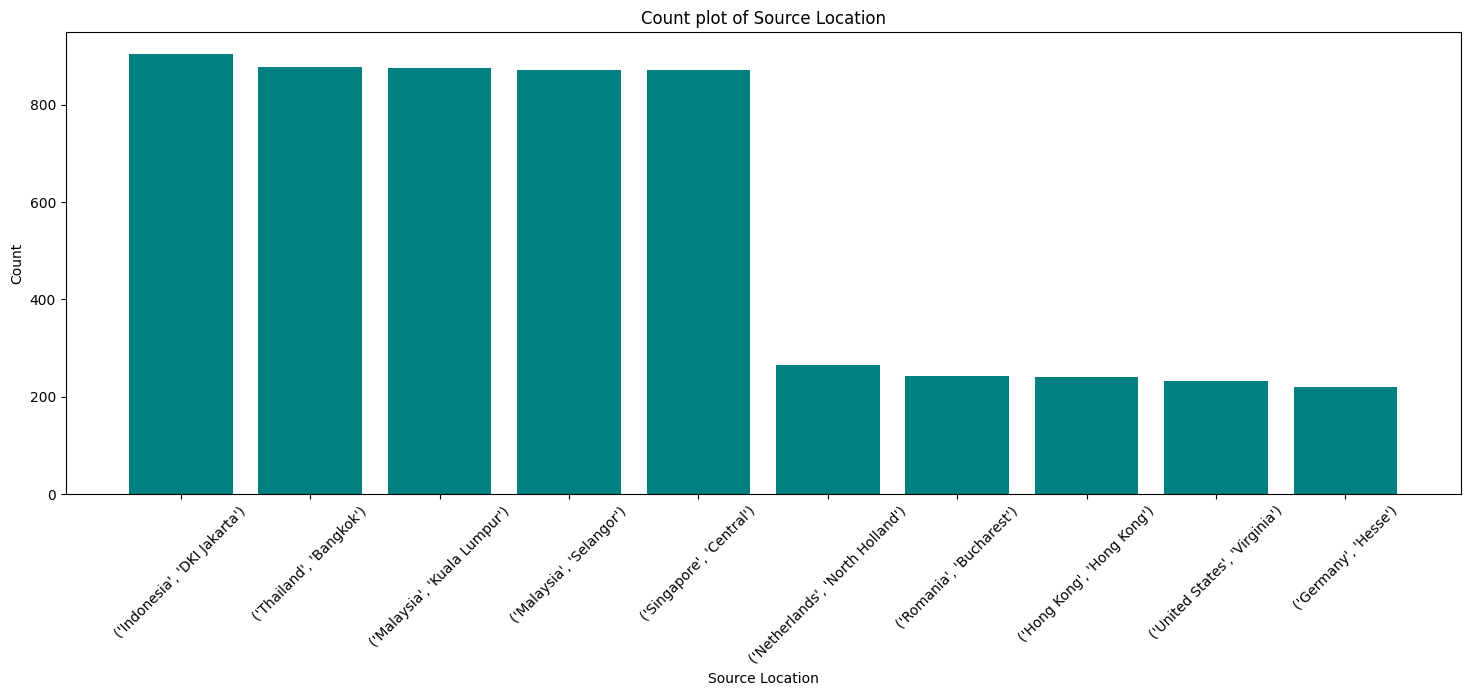

Source_Location
('Indonesia', 'DKI Jakarta')        904
('Thailand', 'Bangkok')             877
('Malaysia', 'Kuala Lumpur')        875
('Malaysia', 'Selangor')            872
('Singapore', 'Central')            871
('Netherlands', 'North Holland')    266
('Romania', 'Bucharest')            243
('Hong Kong', 'Hong Kong')          240
('United States', 'Virginia')       233
('Germany', 'Hesse')                221
Name: count, dtype: int64

In [7]:
source_location_counts = dataframe["Source_Location"].value_counts()

plt.figure(figsize=(18, 6))
plt.bar(source_location_counts.index, source_location_counts, color="teal")
plt.title("Count plot of Source Location")
plt.xticks(rotation=45)
plt.xlabel("Source Location")
plt.ylabel("Count")
plt.show()

source_location_counts

**Count plot of Source Location where Category is Spam**

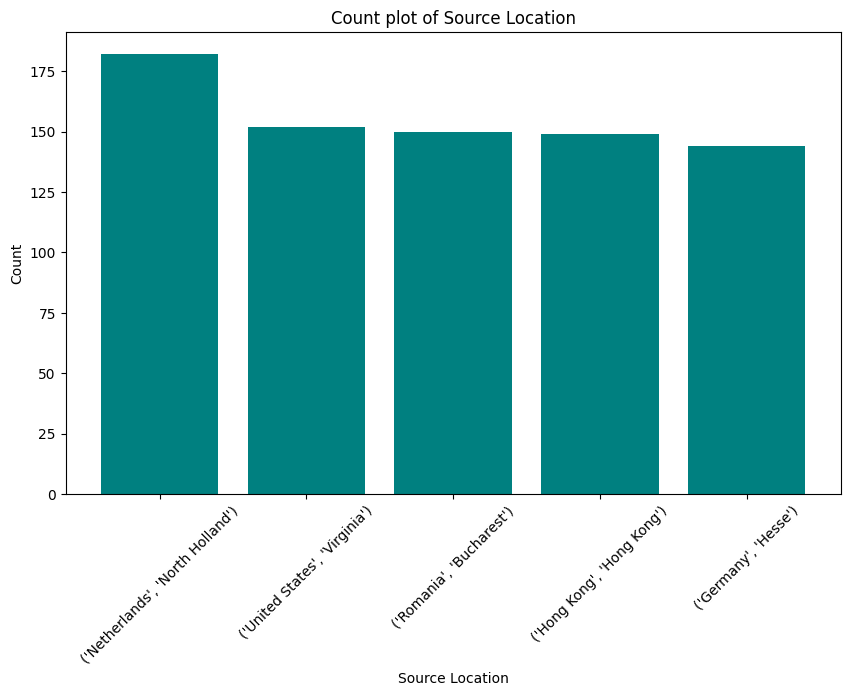

Source_Location
('Netherlands', 'North Holland')    182
('United States', 'Virginia')       152
('Romania', 'Bucharest')            150
('Hong Kong', 'Hong Kong')          149
('Germany', 'Hesse')                144
Name: count, dtype: int64

In [8]:
source_location_counts = dataframe[dataframe["Category"] == "spam"]["Source_Location"].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(source_location_counts.index, source_location_counts, color="teal")
plt.title("Count plot of Source Location")
plt.xticks(rotation=45)
plt.xlabel("Source Location")
plt.ylabel("Count")
plt.show()

source_location_counts

**Count plot of Source Location where Category is Ham**

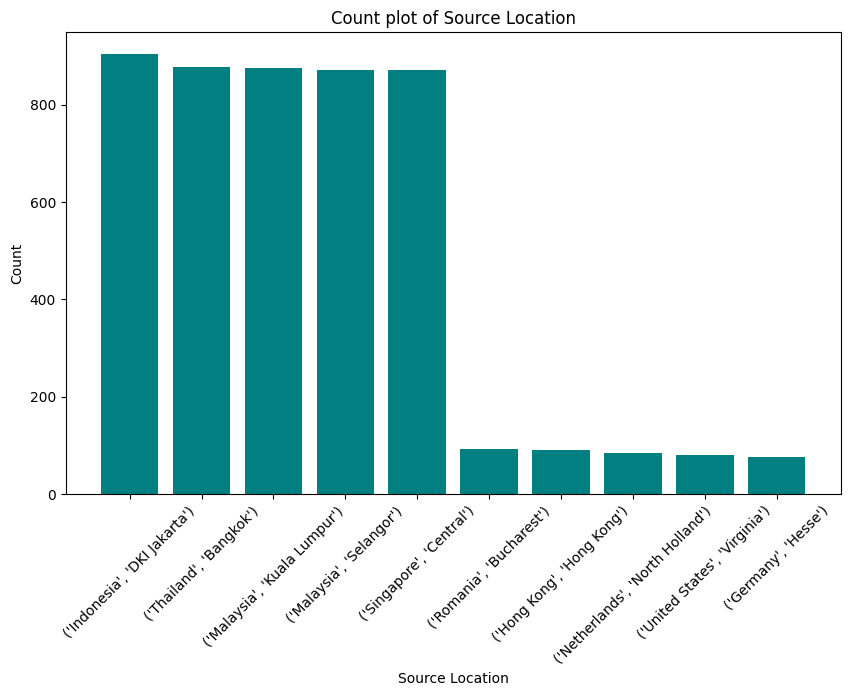

Source_Location
('Indonesia', 'DKI Jakarta')        904
('Thailand', 'Bangkok')             877
('Malaysia', 'Kuala Lumpur')        875
('Malaysia', 'Selangor')            872
('Singapore', 'Central')            871
('Romania', 'Bucharest')             93
('Hong Kong', 'Hong Kong')           91
('Netherlands', 'North Holland')     84
('United States', 'Virginia')        81
('Germany', 'Hesse')                 77
Name: count, dtype: int64

In [9]:
source_location_counts = dataframe[dataframe["Category"] == "ham"]["Source_Location"].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(source_location_counts.index, source_location_counts, color="teal")
plt.title("Count plot of Source Location")
plt.xticks(rotation=45)
plt.xlabel("Source Location")
plt.ylabel("Count")
plt.show()

source_location_counts

**Exploration of Datetime**

In [10]:
def retrieve_time(time_object: str) -> tuple:
    hour, minute, second = time_object.split(':')

    return (int(hour), int(minute), int(second))

In [11]:
dataframe[["Sent_Date", "Sent_Time"]]

,Sent_Date,Sent_Time
0,2025-07-20,16:50:55
1,2025-07-11,16:16:38
2,2025-07-21,00:53:38
3,2025-09-28,14:33:15
4,2025-09-03,12:58:55
...,...,...
5597,2025-09-26,05:59:26
5598,2025-09-24,00:34:02
5599,2025-08-08,05:35:05
5600,2025-07-17,02:44:05


In [12]:
datetime_object: pd.Series = dataframe["Sent_Date"].astype(str) + " " + dataframe["Sent_Time"].astype(str)

dataframe["Datetime_Stamp"] = pd.to_datetime(datetime_object, format="%Y-%m-%d %H:%M:%S")

display(dataframe.head())

,Category,Message,Sent_Date,Sent_Time,Source_IP,Source_Location,Datetime_Stamp
0,ham,"Go until jurong point, crazy.. Available only ...",2025-07-20,16:50:55,203.0.113.61,"('Malaysia', 'Selangor')",2025-07-20 16:50:55
1,ham,Ok lar... Joking wif u oni...,2025-07-11,16:16:38,10.0.240.27,"('Malaysia', 'Selangor')",2025-07-11 16:16:38
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,2025-07-21,00:53:38,37.120.103.92,"('United States', 'Virginia')",2025-07-21 00:53:38
3,ham,U dun say so early hor... U c already then say...,2025-09-28,14:33:15,10.0.179.179,"('United States', 'Virginia')",2025-09-28 14:33:15
4,ham,"Nah I don't think he goes to usf, he lives aro...",2025-09-03,12:58:55,203.0.113.94,"('Thailand', 'Bangkok')",2025-09-03 12:58:55


In [13]:
print(f"First Datetime Stamp: {min(dataframe["Datetime_Stamp"])}")
print(f"Final Datetime Stamp: {max(dataframe["Datetime_Stamp"])}")

First Datetime Stamp: 2025-07-01 00:44:12
Final Datetime Stamp: 2025-09-30 18:43:50


In [14]:
spam_dataframe: pd.DataFrame = dataframe[dataframe["Category"] == "spam"]
ham_dataframe: pd.DataFrame = dataframe[dataframe["Category"] == "ham"]

In [15]:
display(spam_dataframe.head())

,Category,Message,Sent_Date,Sent_Time,Source_IP,Source_Location,Datetime_Stamp
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,2025-07-21,00:53:38,37.120.103.92,"('United States', 'Virginia')",2025-07-21 00:53:38
5,spam,FreeMsg Hey there darling it's been 3 week's n...,2025-07-21,05:25:08,5.188.102.163,"('United States', 'Virginia')",2025-07-21 05:25:08
8,spam,WINNER!! As a valued network customer you have...,2025-09-13,04:34:39,198.51.100.161,"('Romania', 'Bucharest')",2025-09-13 04:34:39
9,spam,Had your mobile 11 months or more? U R entitle...,2025-08-01,04:55:30,198.51.100.60,"('Netherlands', 'North Holland')",2025-08-01 04:55:30
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",2025-08-04,05:41:07,37.120.94.21,"('Netherlands', 'North Holland')",2025-08-04 05:41:07


In [16]:
display(ham_dataframe.head())

,Category,Message,Sent_Date,Sent_Time,Source_IP,Source_Location,Datetime_Stamp
0,ham,"Go until jurong point, crazy.. Available only ...",2025-07-20,16:50:55,203.0.113.61,"('Malaysia', 'Selangor')",2025-07-20 16:50:55
1,ham,Ok lar... Joking wif u oni...,2025-07-11,16:16:38,10.0.240.27,"('Malaysia', 'Selangor')",2025-07-11 16:16:38
3,ham,U dun say so early hor... U c already then say...,2025-09-28,14:33:15,10.0.179.179,"('United States', 'Virginia')",2025-09-28 14:33:15
4,ham,"Nah I don't think he goes to usf, he lives aro...",2025-09-03,12:58:55,203.0.113.94,"('Thailand', 'Bangkok')",2025-09-03 12:58:55
6,ham,Even my brother is not like to speak with me. ...,2025-09-13,10:41:31,192.168.193.51,"('Thailand', 'Bangkok')",2025-09-13 10:41:31


In [18]:
from datetime import time

min_ham_time: time = time(*retrieve_time(min(ham_dataframe["Sent_Time"])))
max_ham_time: time = time(*retrieve_time(max(ham_dataframe["Sent_Time"])))

min_spam_time: time = time(*retrieve_time(min(spam_dataframe["Sent_Time"])))
max_spam_time: time = time(*retrieve_time(max(spam_dataframe["Sent_Time"])))

print(f"Usual Times: {min_ham_time} - {max_ham_time}")
print(f"Suspicious Times: {min_spam_time} - {max_spam_time}")

Usual Times: 09:00:14 - 18:59:58
Suspicious Times: 00:00:43 - 05:59:26
